# Application: order list & google trend

## 8-1: Crawling website ranking information


### 8-1-1 Crawling movie's taipei Ranking list.

 "http://app2.atmovies.com.tw/boxoffice/" can see top 5
 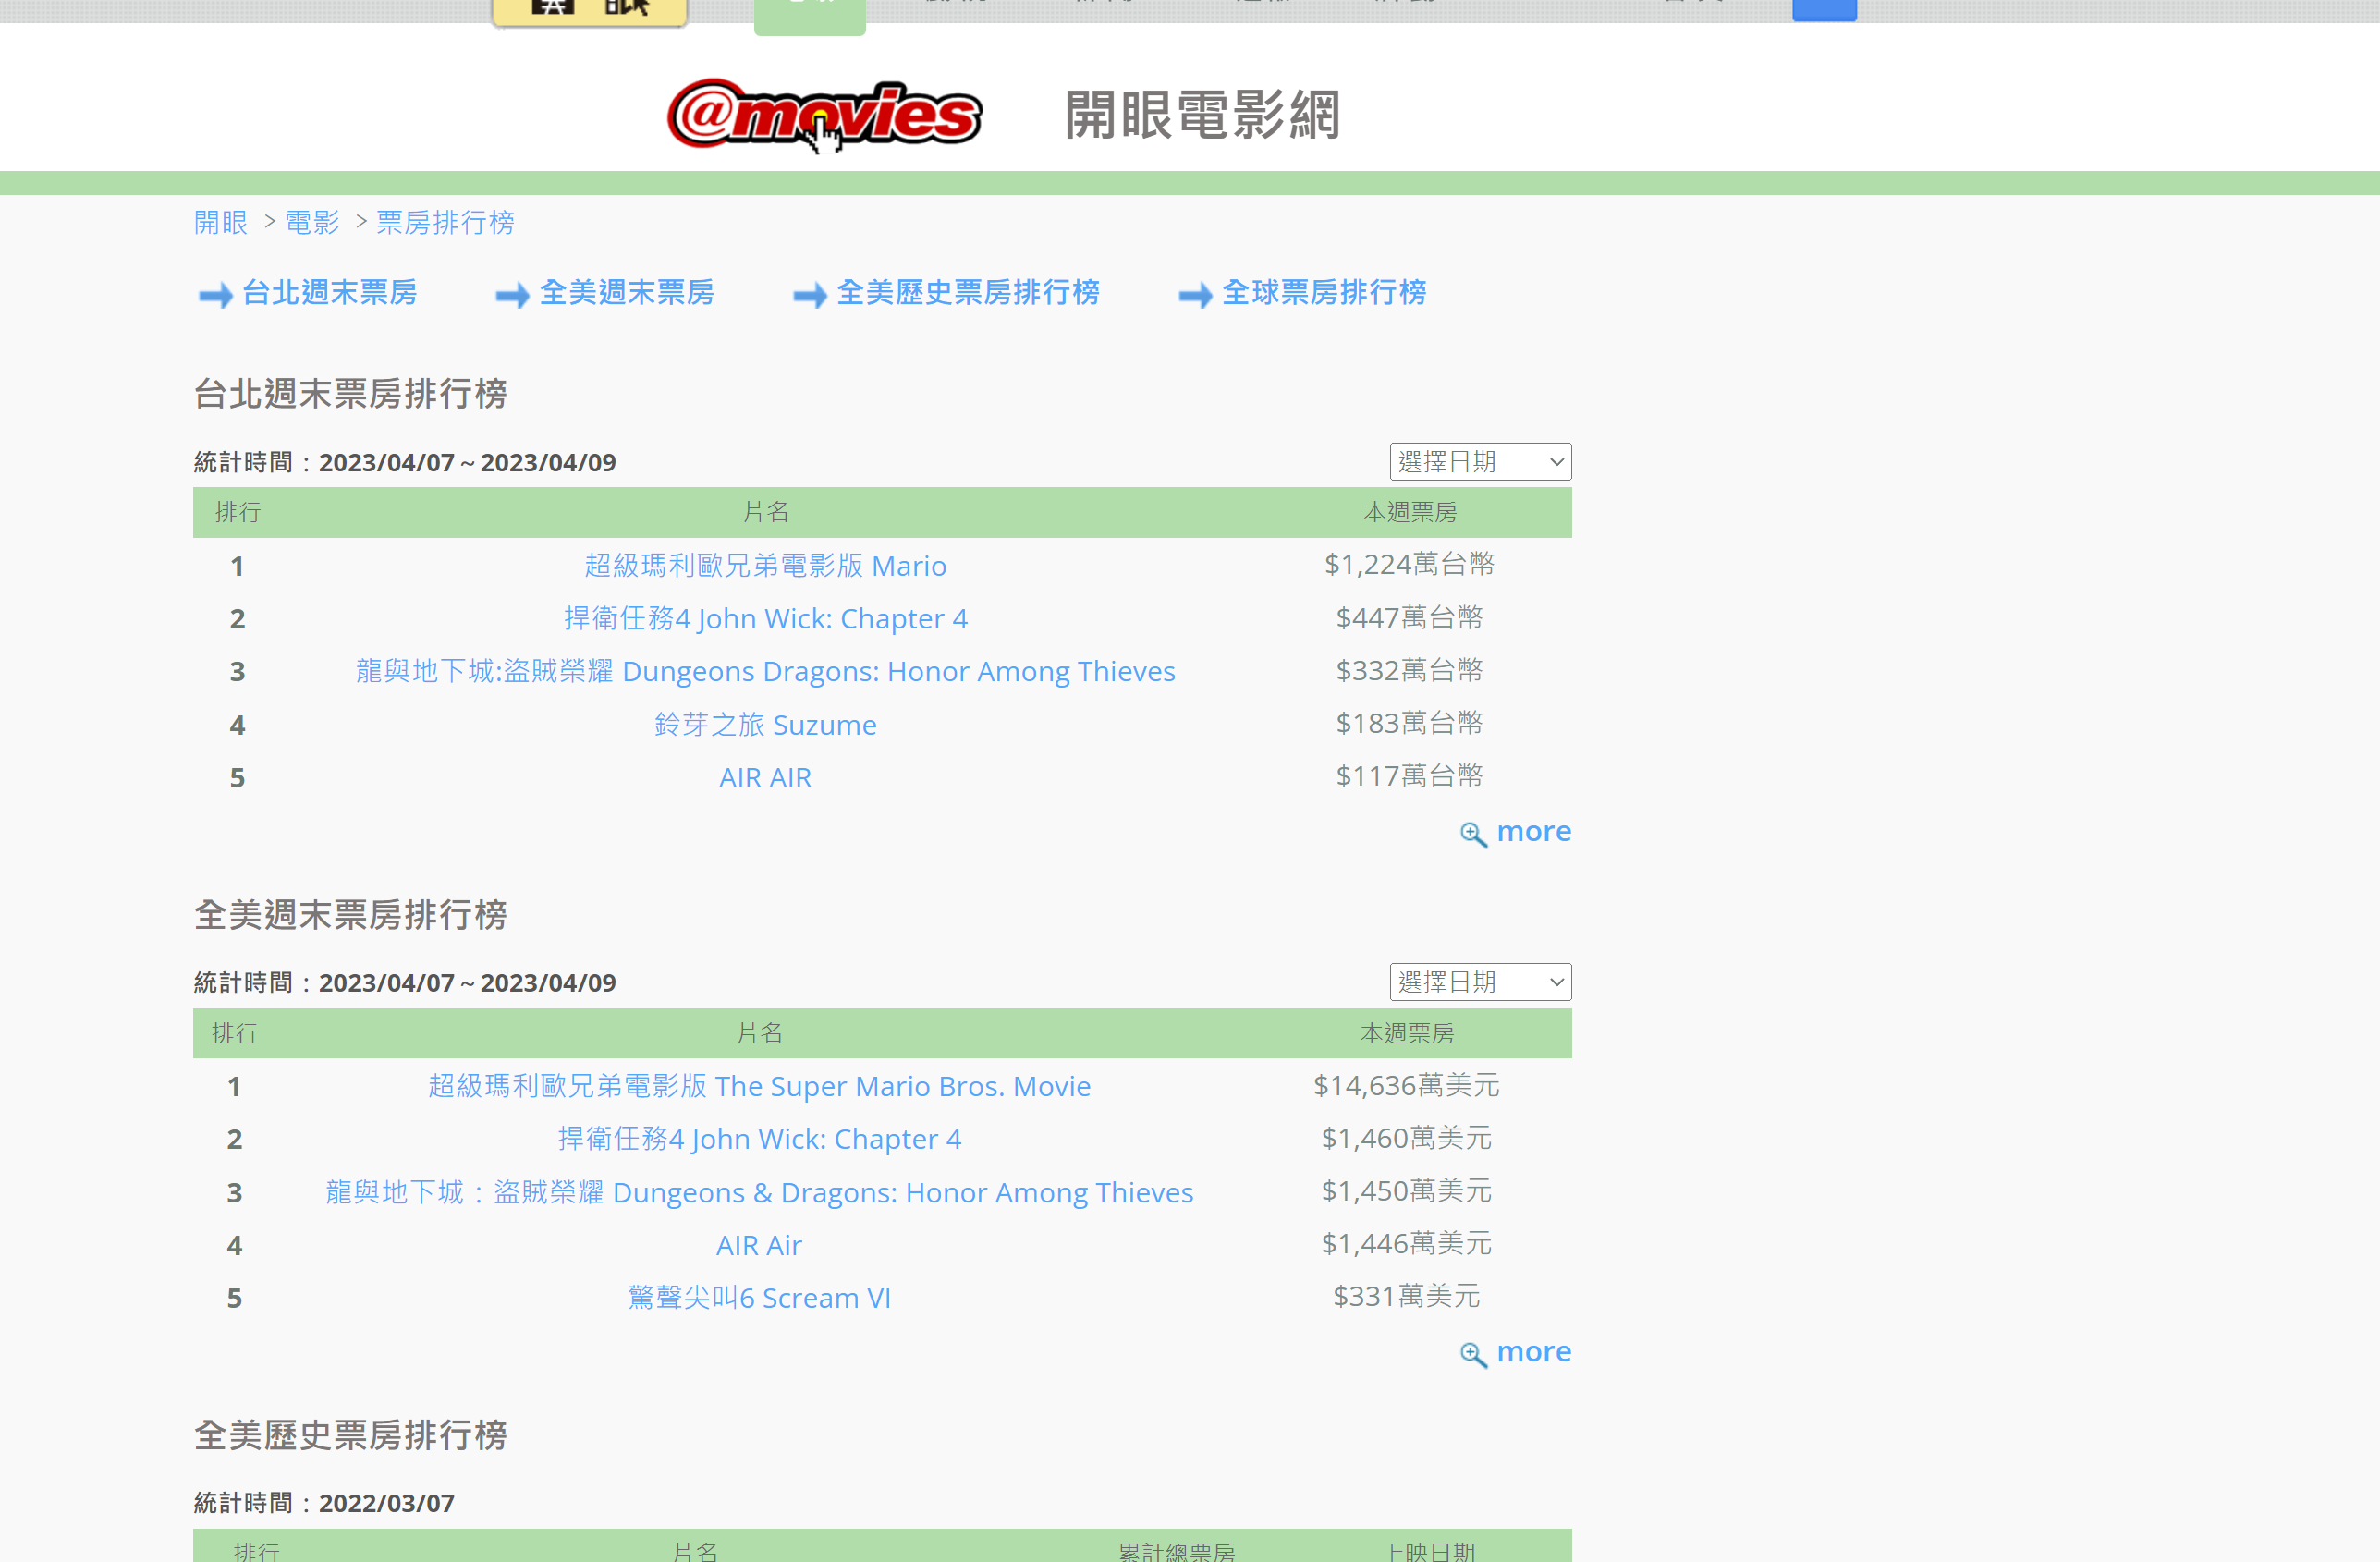

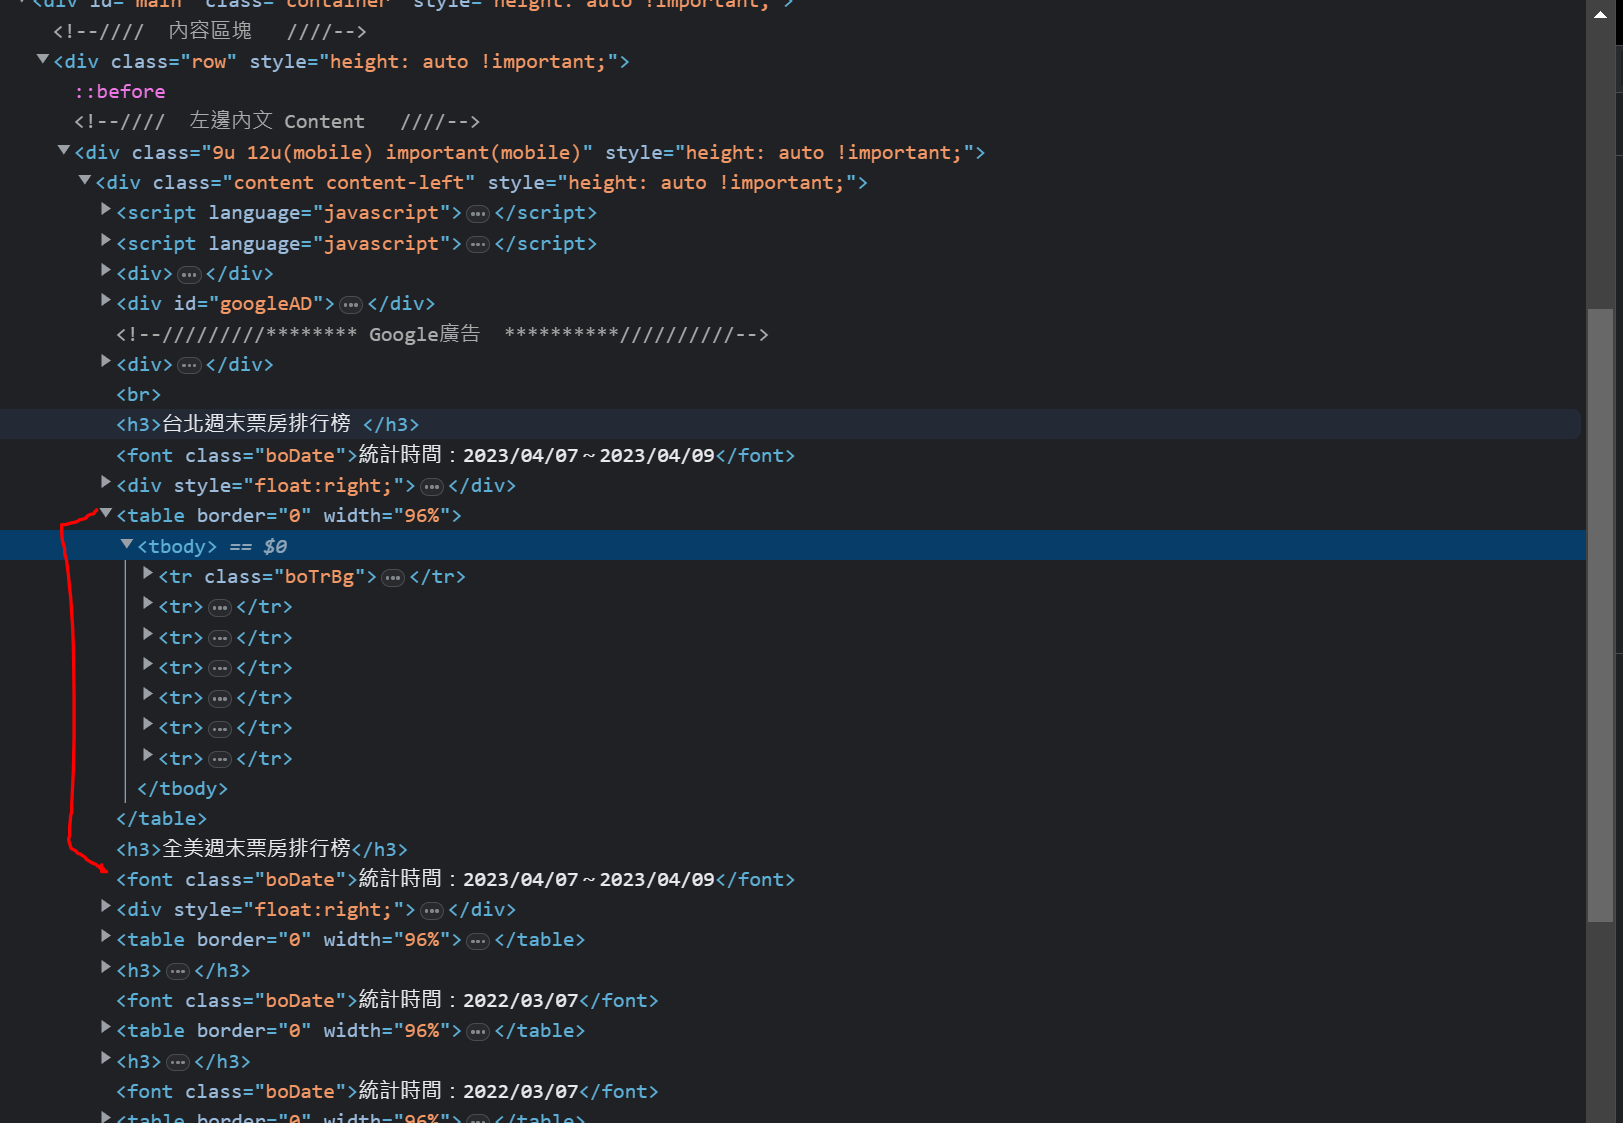

In [1]:
import requests 
from bs4 import BeautifulSoup

url = "http://app2.atmovies.com.tw/boxoffice/"
r = requests.get(url)
r.encoding = "utf8"
soup = BeautifulSoup(r.text, "lxml")
tag_table = soup.find("table")   # find 1st table
rows = tag_table.find_all("tr") 
items = []
for row in rows:
    item = []
    for cell in row.find_all("td"):
        item.append(cell.text.replace("\n","").replace("\r","").strip())
    if item and item[0] != "more":
        items.append(item) 

print(items)


[['排行', '片名', '本週票房'], ['1', '超級瑪利歐兄弟電影版 Mario', '$1,224萬台幣'], ['2', '捍衛任務4 John Wick: Chapter 4', '$447萬台幣'], ['3', '龍與地下城:盜賊榮耀 Dungeons Dragons: Honor Among Thieves', '$332萬台幣'], ['4', '鈴芽之旅 Suzume', '$183萬台幣'], ['5', 'AIR AIR', '$117萬台幣']]


### 8-1-2 Yahoo! movie ranking list

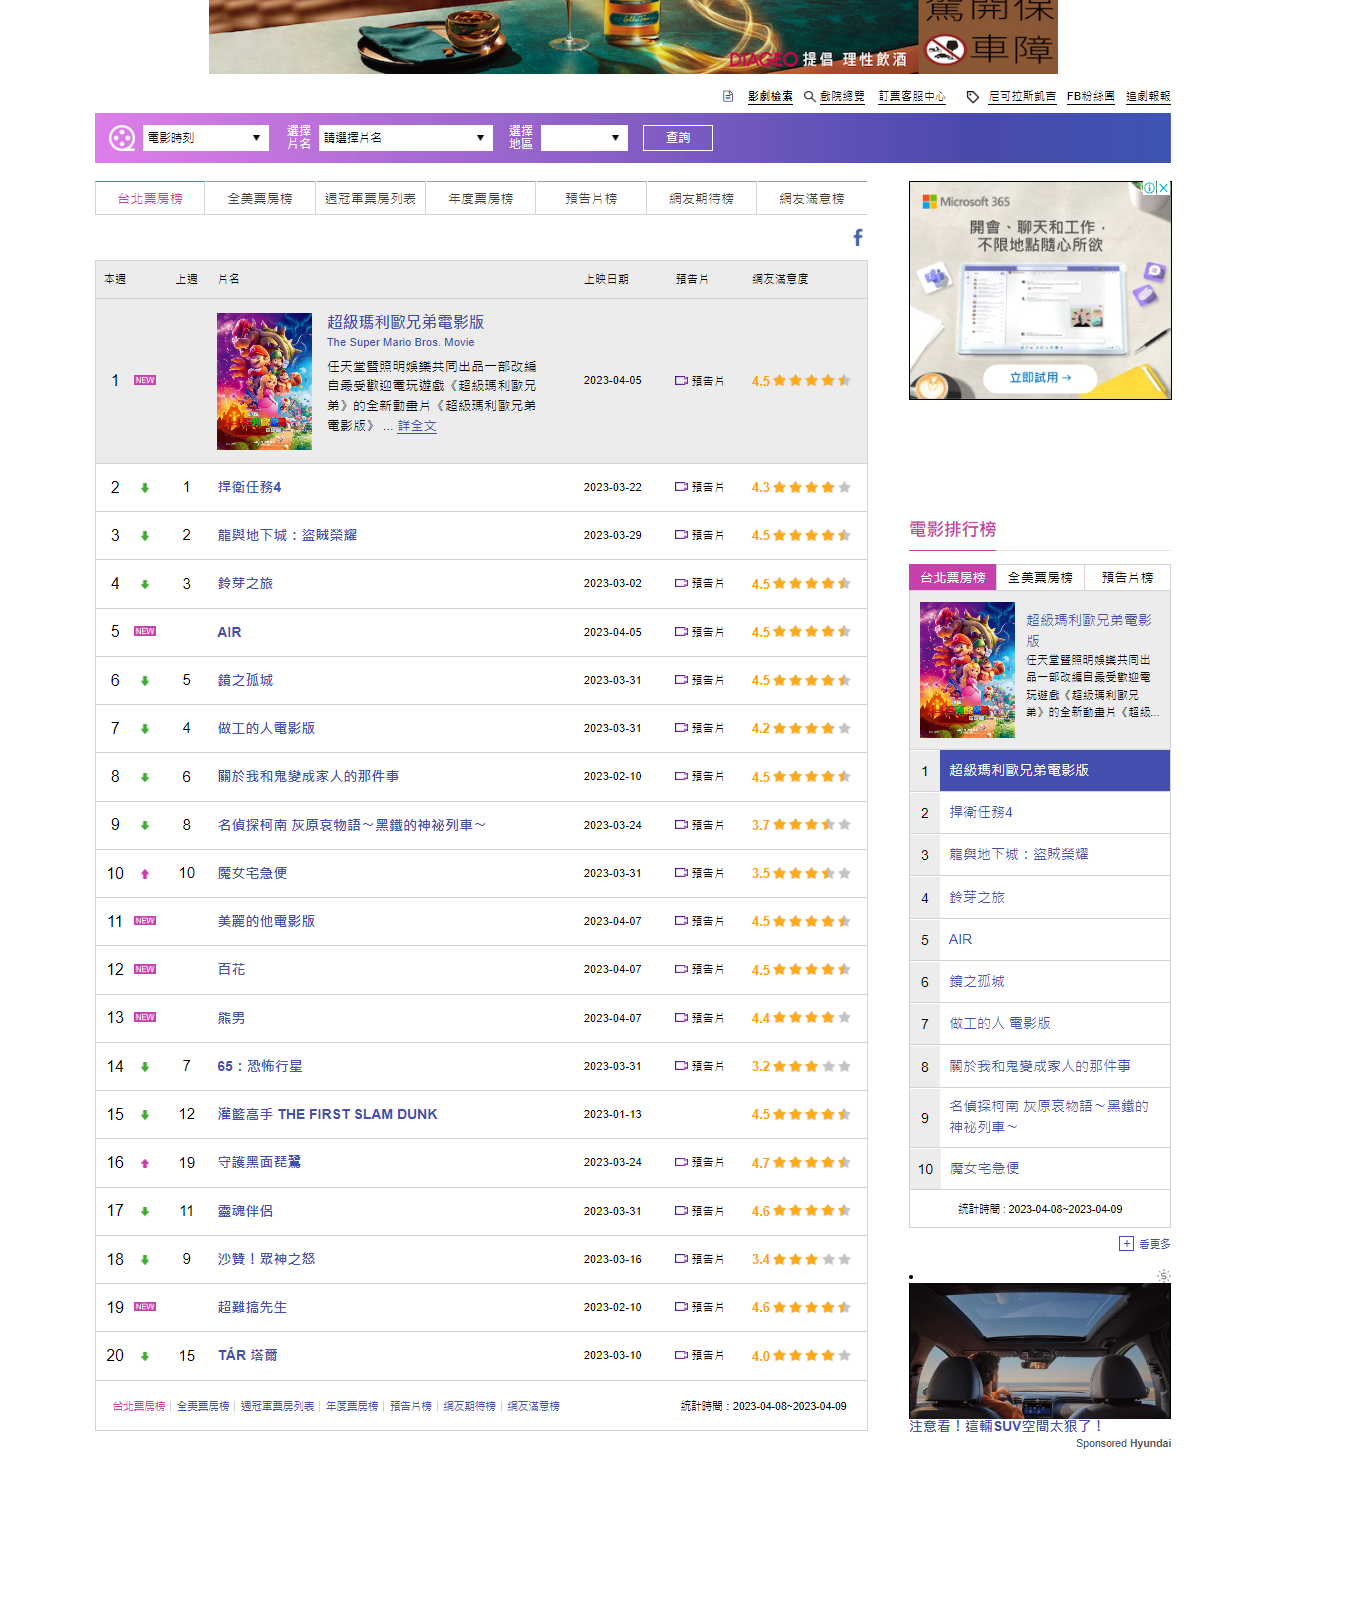

In [1]:
import requests 
from bs4 import BeautifulSoup
import csv

url = "https://movies.yahoo.com.tw/chart.html"
csvfile = "yahoomovies.csv"
r = requests.get(url)
r.encoding = "utf8"
soup = BeautifulSoup(r.text, "lxml")
tag_table = soup.find("div", class_="rank_list") 
rows = soup.find_all('div', class_='tr')
colname = list(rows.pop(0).stripped_strings)
items = []
for row in rows:
    tds = row.find_all("div", class_="td")
    item = []
    item.append(tds[0].text)
    item.append(tds[2].text)
    title = tds[3].text.strip()
    if "\n" in title:
        x = title.split("\n")
        title = x[0]
    item.append(title)
    item.append(tds[4].text.strip())
    item.append(tds[5].text.strip())
    item.append(tds[6].text.strip())
    items.append(item)

with open(csvfile, 'w+', newline='') as fp:
    writer = csv.writer(fp)
    writer.writerow(colname)
    for item in items:
        writer.writerow(item)

UnicodeEncodeError: 'cp950' codec can't encode character '\u301c' in position 15: illegal multibyte sequence

In [6]:
import requests 
from bs4 import BeautifulSoup
import csv

url = "https://movies.yahoo.com.tw/chart.html"
csvfile = "yahoomovies.csv"
r = requests.get(url)
r.encoding = "utf8"
soup = BeautifulSoup(r.text, "lxml")
tag_table = soup.find("div", class_="rank_list") 
rows = soup.find_all('div', class_='tr')
colname = list(rows.pop(0).stripped_strings)  # 使用 stripped_strings 方法獲取該列中所有儲存格的文字內容（去除開頭和結尾的空格），
#接著使用 list 函數將其轉換為一個列表，並將其賦值給 colname 變量
items = []
for row in rows:
    tds = row.find_all("div", class_="td")
    item = []
    item.append(tds[0].text)
    item.append(tds[2].text)
    title = tds[3].text.strip()
    if "\n" in title:
        x = title.split("\n")
        title = x[0]
    item.append(title)
    item.append(tds[4].text.strip())
    item.append(tds[5].text.strip())
    item.append(tds[6].text.strip())
    items.append(item)

with open(csvfile, 'w+', newline='', encoding='utf-8') as fp:
    writer = csv.writer(fp)
    writer.writerow(colname)
    for item in items:
        writer.writerow(item)


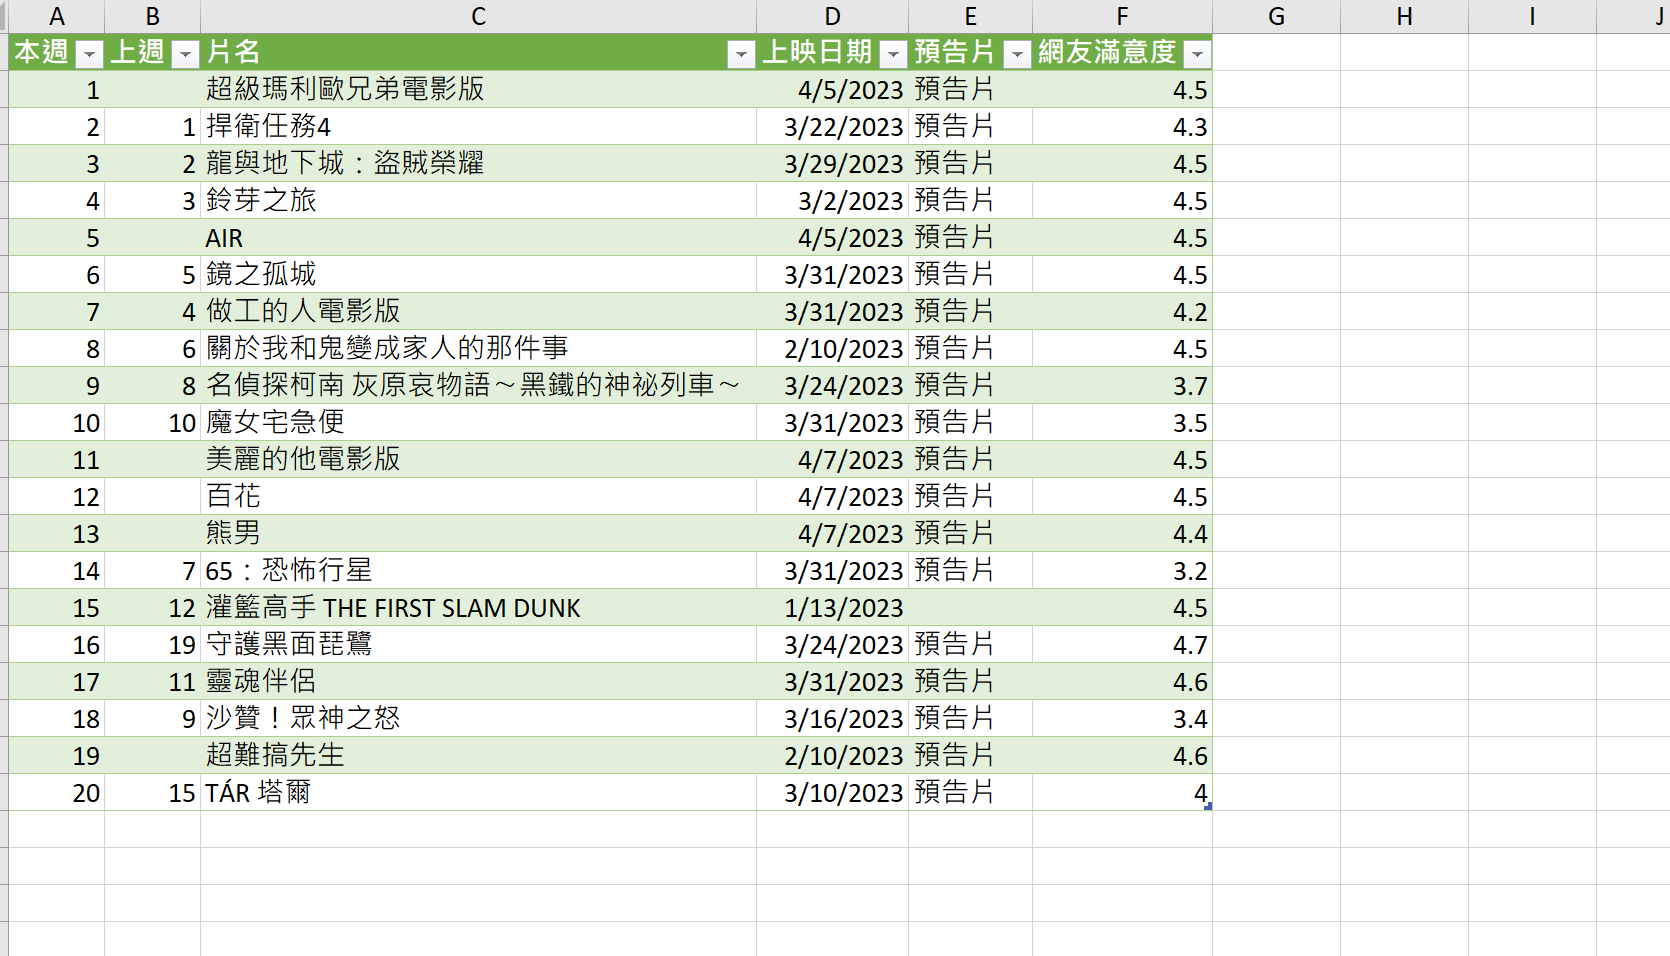

### 8-1-3 愛食記台北餐廳top 5

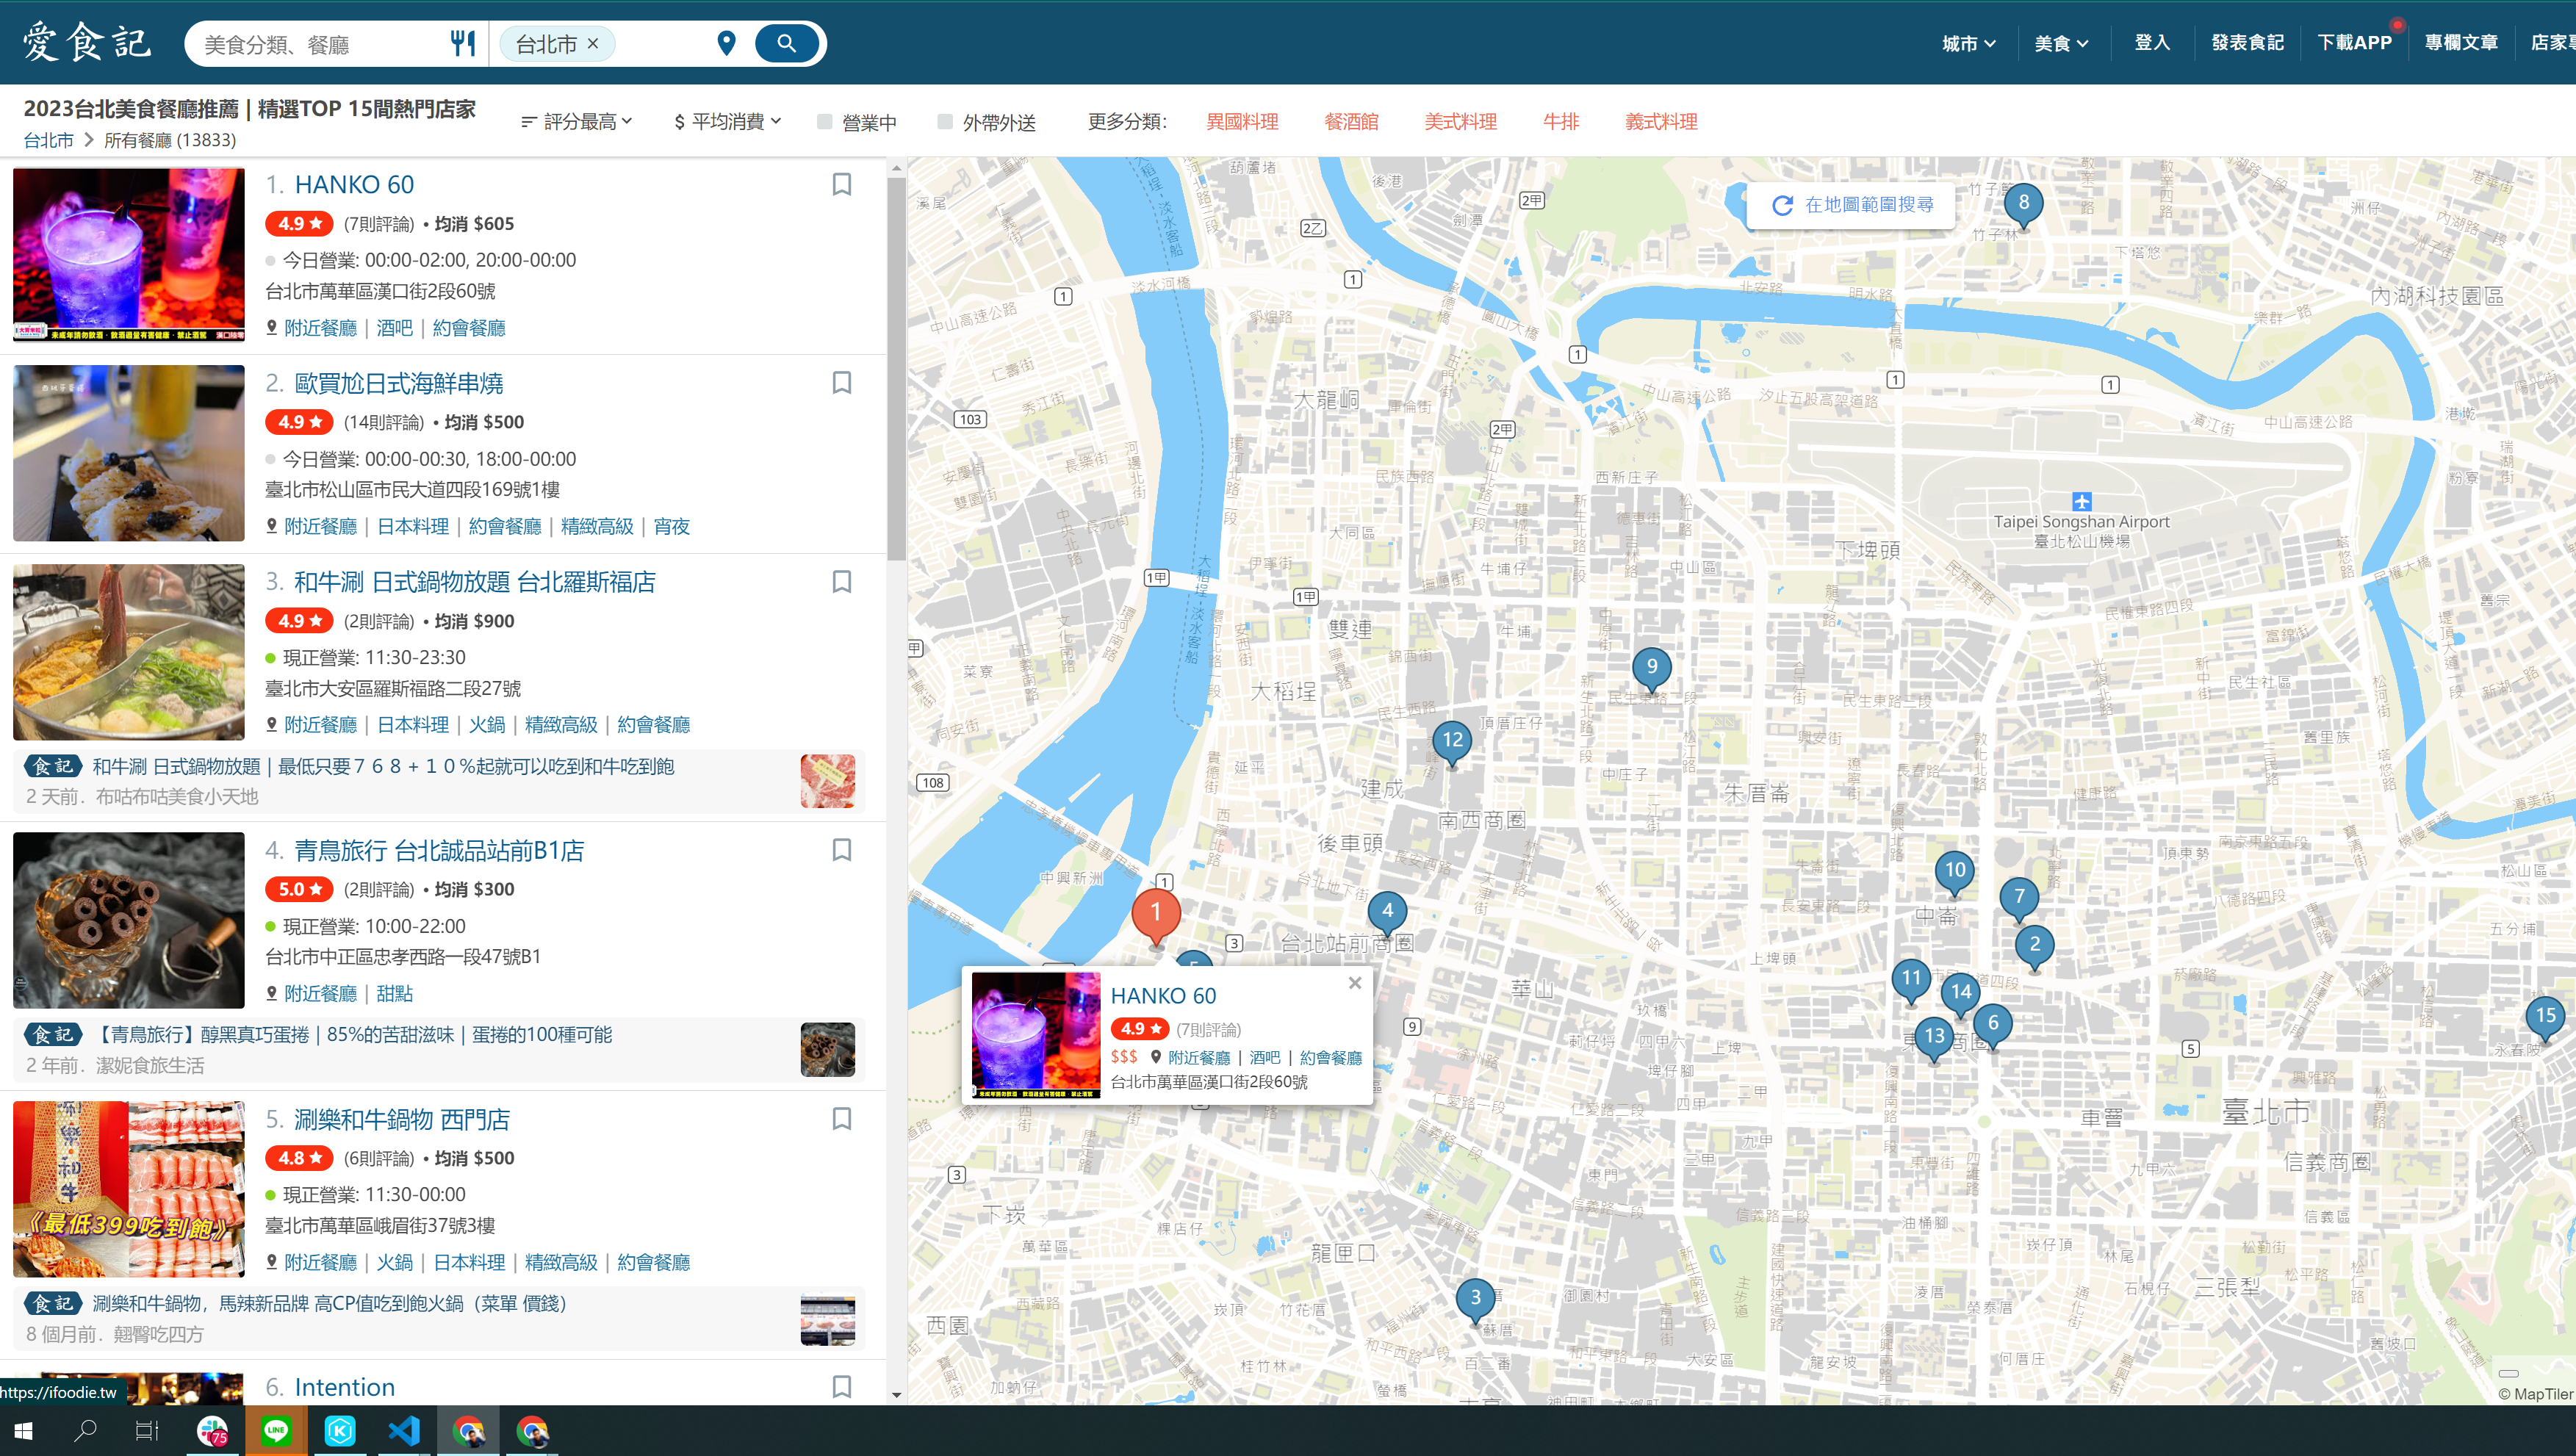

In [1]:
from bs4 import BeautifulSoup
import requests

url = "https://ifoodie.tw/explore/台北市/list?sortby=rating"
r = requests.get(url)
soup = BeautifulSoup(r.text, 'lxml')
item_lst = soup.find("div", class_="item-list")
items = item_lst.find_all("div", class_="restaurant-item")
print(len(items))
for index in range(5):
    item = items[index]
    title = item.find("a", class_="title-text")
    if title: print(title.text)
    address = item.find("div", class_="address-row")
    if address: print(address.text)
    avg_price = item.find("div", class_="avg-price")
    if avg_price: print(avg_price.text[2:])
    message = item.find("div", class_="message-text")
    if message: print(message.text)
    print("-------------------")



15
HANKO 60
台北市萬華區漢口街2段60號
均消 $605
西門町戲院酒吧 HANKO 60 如醉如夢～是看戲還是買醉?! 新聲大戲院調酒劇場!!
-------------------
歐買尬日式海鮮串燒
臺北市松山區市民大道四段169號1樓
均消 $500
-------------------
和牛涮 日式鍋物放題 台北羅斯福店
臺北市大安區羅斯福路二段27號
均消 $900
-------------------
青鳥旅行 台北誠品站前B1店
台北市中正區忠孝西路一段47號B1
均消 $300
【青鳥旅行】醇黑真巧蛋捲｜85%的苦甜滋味｜蛋捲的100種可能
-------------------
涮樂和牛鍋物 西門店
臺北市萬華區峨眉街37號3樓
均消 $500
-------------------


### 8-1-4 博客來 ranking list

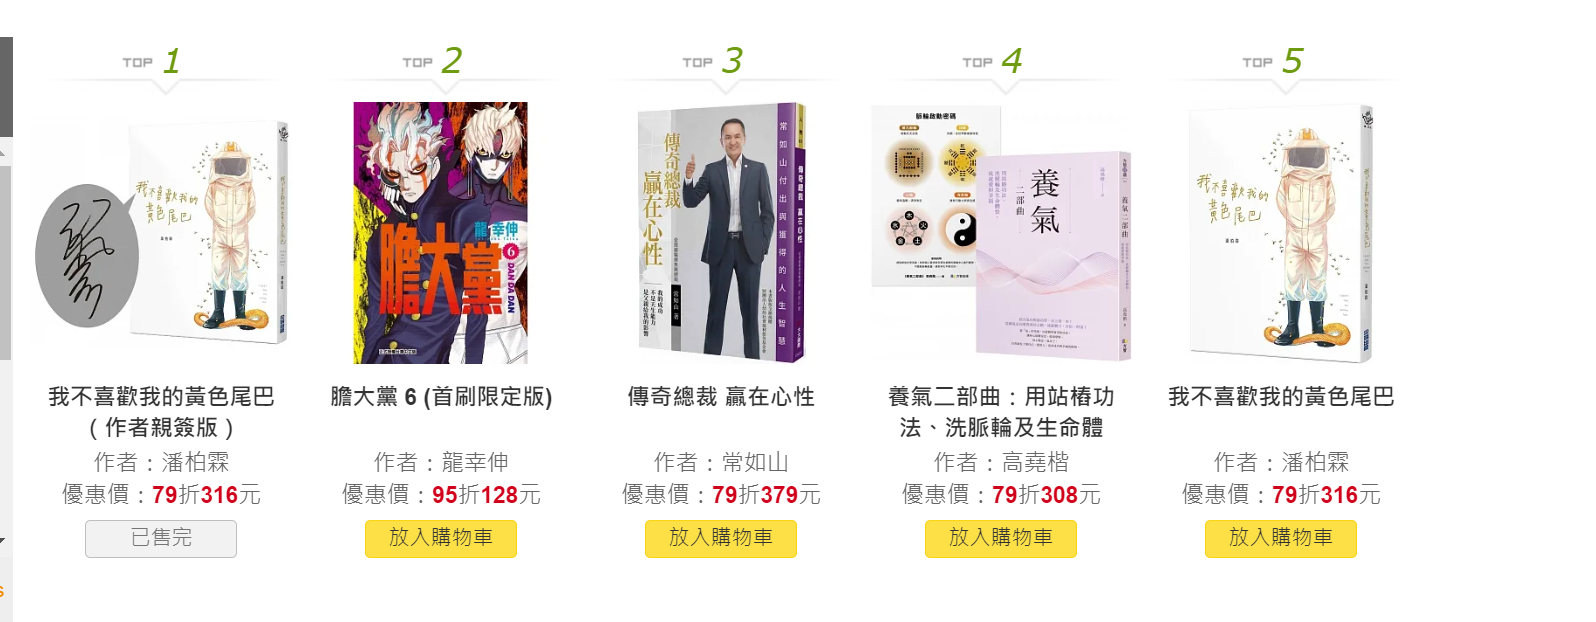

In [4]:
pip install fake_useragent

     -------------------------------------- 50.5/50.5 kB 515.9 kB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 5.1.0
    Uninstalling importlib-metadata-5.1.0:
      Successfully uninstalled importlib-metadata-5.1.0
Note: you may need to restart the kernel to use updated packages.


In [24]:
import requests
from bs4 import BeautifulSoup
import csv
from fake_useragent import UserAgent

csvfile = "books.csv"
url = "http://www.books.com.tw/web/sys_hourstop/home?loc=P_003_001"
ua = UserAgent()
headers = {'user-agent' : ua.random}
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, 'lxml')
tag_ul = soup.find_all("ul", class_="clearfix")

tag_ul = tag_ul[1]
# print(tag_ul)
# tag_ul = soup.find("ul", class_="main_column")


# //*[@id="home-page"]/body/div[4]/div/div[2]/div[1]/div/div[1]/ul

rows = tag_ul.find_all("li", class_="item")

print(rows)

print(len(rows))
items = []
for row in rows:
    item = []
    top = row.find("strong", class_="no")
    item.append(top.text.strip())
    title = row.find("h4")
    item.append(title.text.strip())
    item.append(title.find("a").get("href"))
    img = row.find("img", class_="cover")
    item.append(img.get("src"))
    price = row.find("ul", class_="msg").find("li",class_="price_a")
    item.append(price.text.strip())
    items.append(item)

    
with open(csvfile, 'w+', newline='') as fp:
    writer = csv.writer(fp)
    writer.writerow(["排名","名稱","網址","圖片","價格"])
    for item in items:
        writer.writerow(item)

[<li class="item">
<div class="stitle">
<p class="no_list"><span class="symbol icon_01">TOP</span><strong class="no">1</strong></p>
</div><a href="https://www.books.com.tw/products/0010954065?loc=P_0004_001"><img alt="我不喜歡我的黃色尾巴（作者親簽版）" class="cover" src="https://im2.book.com.tw/image/getImage?i=https://www.books.com.tw/img/001/095/40/0010954065.jpg&amp;v=642572c1k&amp;w=150&amp;h=150" srcset="https://im2.book.com.tw/image/getImage?i=https://www.books.com.tw/img/001/095/40/0010954065.jpg&amp;v=642572c1k&amp;w=300&amp;h=300 2x,https://im2.book.com.tw/image/getImage?i=https://www.books.com.tw/img/001/095/40/0010954065.jpg&amp;v=642572c1k&amp;w=450&amp;h=450 3x"/></a>
<div class="type02_bd-a">
<h4><a href="https://www.books.com.tw/products/0010954065?loc=P_0004_001">我不喜歡我的黃色尾巴（作者親簽版）</a></h4>
<ul class="msg">
<li>作者：<a href="https://search.books.com.tw/search/query/key/%E6%BD%98%E6%9F%8F%E9%9C%96">潘柏霖</a></li>
<li class="price_a">優惠價：<strong><b>79</b></strong>折<strong><b>316</b></strong>元

* Here we go

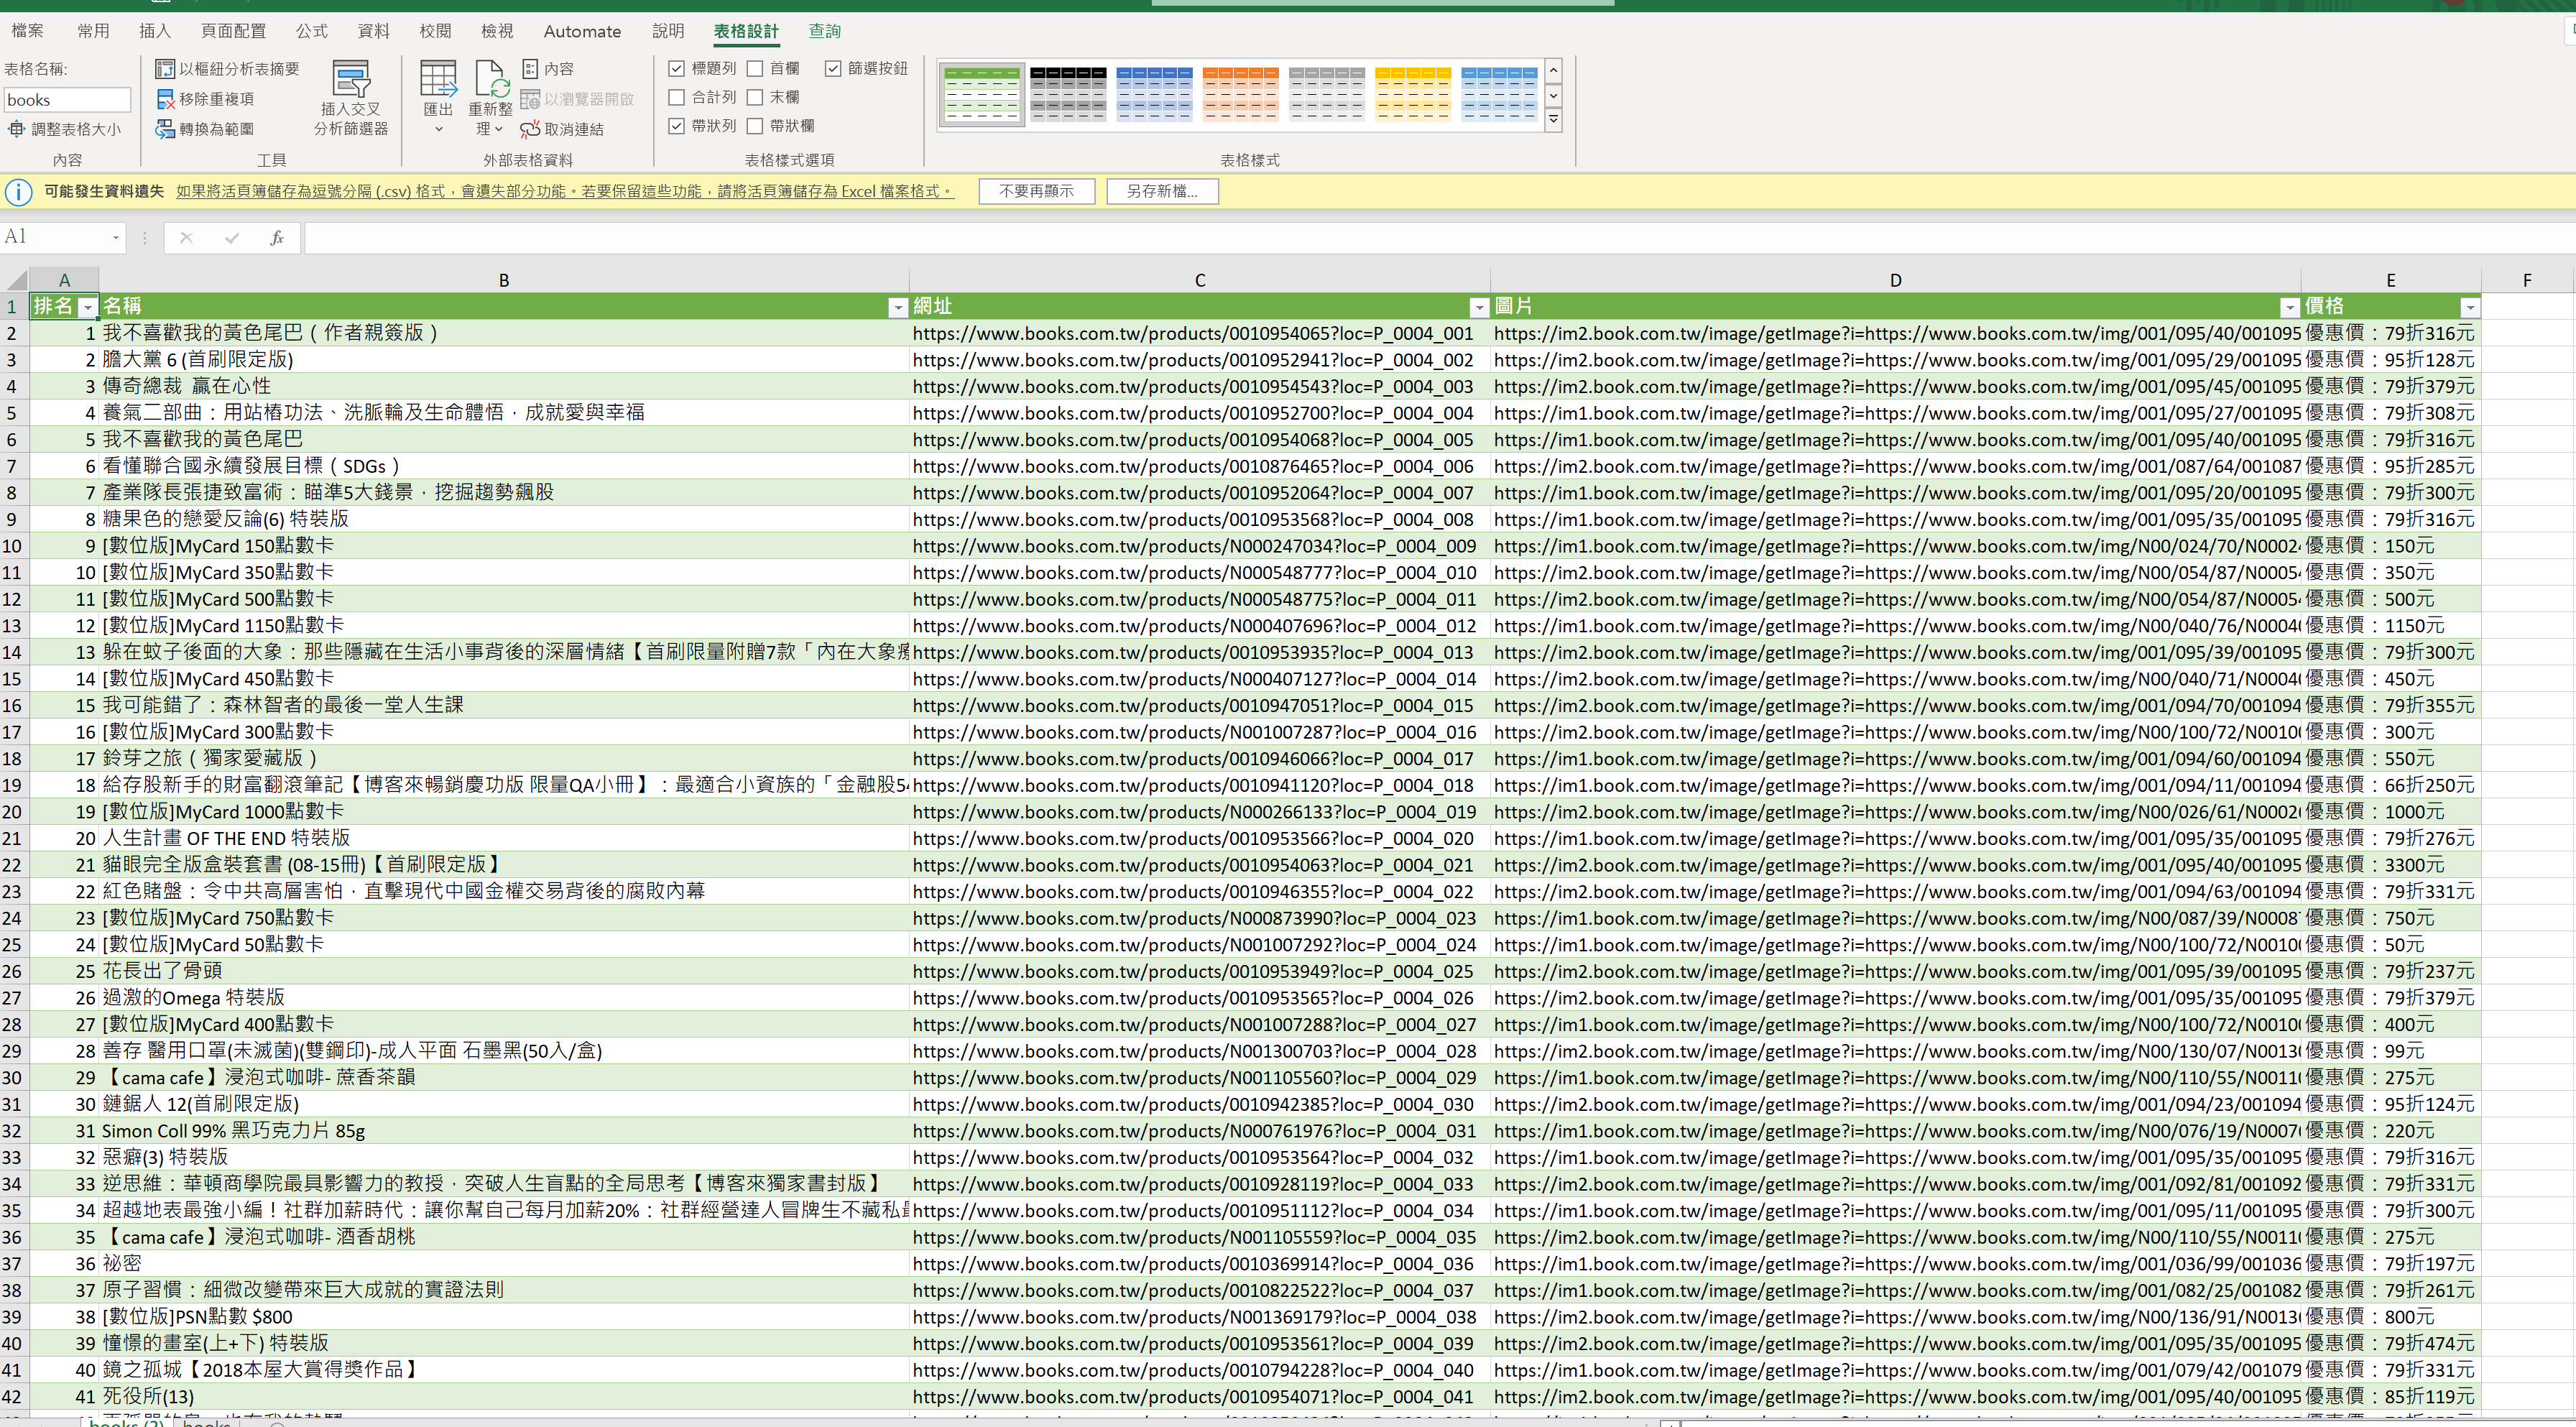

### 8-2 Google trend (in-progress)

In [25]:
import re
import json
import requests
import pandas as pd

date = "20200813"
URL = "https://trends.google.com.tw/trends/api/dailytrends?hl=zh-TW&tz=-480&ed={}&geo=TW&ns=15"
url = URL.format(date)
r = requests.get(url)
json_str = re.sub("\)\]\}\',\n", "", r.text)
data = json.loads(json_str)
results = data["default"]["trendingSearchesDays"][0]["trendingSearches"]
items = []
for item in results:
    items.append(item["title"])
df = pd.DataFrame(items)

print(df.head())



IndexError: list index out of range

In [26]:
import re
import json
import requests
import pandas as pd
import datetime
from fake_useragent import UserAgent

URL = "https://trends.google.com.tw/trends/api/dailytrends?hl=zh-TW&tz=-480&ed={}&geo=TW&ns=15"

ua = UserAgent()
enddate = datetime.datetime.today()
startdate = enddate - datetime.timedelta(days=29)
all_items = []
start = datetime.datetime.strftime(startdate,'%Y%m%d')
end = datetime.datetime.strftime(enddate,'%Y%m%d')
for i in pd.date_range(start=start, end=end, freq='1D'):
    url = URL.format(datetime.datetime.strftime(i, '%Y%m%d'))
    print(url)
    headers = {'user-agent' : ua.random}
    r = requests.get(url, headers=headers)
    json_str = re.sub("\)\]\}\',\n", "", r.text)
    data = json.loads(json_str)
    results = data["default"]["trendingSearchesDays"][0]["trendingSearches"]
    items = []
    rank = 1
    for item in results:
        dic = item["title"]
        dic["rank"] = rank        
        items.append(dic)
        rank = rank + 1
    df = pd.DataFrame(items)
    df['date'] = datetime.datetime.strftime(i, '%Y-%m-%d')
    print(df.head())
    all_items.append(df)
   
df = pd.concat(all_items, ignore_index=True)
df.to_csv("trends.csv",index=False)

https://trends.google.com.tw/trends/api/dailytrends?hl=zh-TW&tz=-480&ed=20230316&geo=TW&ns=15
    query                                        exploreLink  rank        date
0  普發6000  /trends/explore?q=%E6%99%AE%E7%99%BC6000&date=...     1  2023-03-16
1     台企銀  /trends/explore?q=%E5%8F%B0%E4%BC%81%E9%8A%80&...     2  2023-03-16
2     輕航機  /trends/explore?q=%E8%BC%95%E8%88%AA%E6%A9%9F&...     3  2023-03-16
3     郭文貴  /trends/explore?q=%E9%83%AD%E6%96%87%E8%B2%B4&...     4  2023-03-16
4   經典賽戰績  /trends/explore?q=%E7%B6%93%E5%85%B8%E8%B3%BD%...     5  2023-03-16
https://trends.google.com.tw/trends/api/dailytrends?hl=zh-TW&tz=-480&ed=20230317&geo=TW&ns=15
       query                                        exploreLink  rank  \
0  BLACKPINK  /trends/explore?q=BLACKPINK&date=today+1-m&geo=TW     1   
1       菅原初代  /trends/explore?q=%E8%8F%85%E5%8E%9F%E5%88%9D%...     2   
2         樂天  /trends/explore?q=%E6%A8%82%E5%A4%A9&date=toda...     3   
3    Copilot    /trends/explore?q=Copilot&date

          query                                        exploreLink  rank  \
0           六福村  /trends/explore?q=%E5%85%AD%E7%A6%8F%E6%9D%91&...     1   
1  TOYOTA CROWN  /trends/explore?q=TOYOTA+CROWN&date=today+1-m&...     2   
2           周興哲  /trends/explore?q=%E5%91%A8%E8%88%88%E5%93%B2&...     3   
3        台中房屋倒塌  /trends/explore?q=%E5%8F%B0%E4%B8%AD%E6%88%BF%...     4   
4         Tesla      /trends/explore?q=Tesla&date=today+1-m&geo=TW     5   

         date  
0  2023-03-30  
1  2023-03-30  
2  2023-03-30  
3  2023-03-30  
4  2023-03-30  
https://trends.google.com.tw/trends/api/dailytrends?hl=zh-TW&tz=-480&ed=20230331&geo=TW&ns=15
    query                                        exploreLink  rank        date
0  6000入帳  /trends/explore?q=6000%E5%85%A5%E5%B8%B3&date=...     1  2023-03-31
1     模仿犯  /trends/explore?q=%E6%A8%A1%E4%BB%BF%E7%8A%AF&...     2  2023-03-31
2     愚人節  /trends/explore?q=%E6%84%9A%E4%BA%BA%E7%AF%80&...     3  2023-03-31
3     MLB        /trends/explore?q=ML

         query                                        exploreLink  rank  \
0        我推的孩子  /trends/explore?q=%E6%88%91%E6%8E%A8%E7%9A%84%...     1   
1         國安基金  /trends/explore?q=%E5%9C%8B%E5%AE%89%E5%9F%BA%...     2   
2  ROG Phone 7  /trends/explore?q=ROG+Phone+7&date=now+7-d&geo=TW     3   
3          賴清德  /trends/explore?q=%E8%B3%B4%E6%B8%85%E5%BE%B7&...     4   
4           高端  /trends/explore?q=%E9%AB%98%E7%AB%AF&date=now+...     5   

         date  
0  2023-04-13  
1  2023-04-13  
2  2023-04-13  
3  2023-04-13  
4  2023-04-13  
https://trends.google.com.tw/trends/api/dailytrends?hl=zh-TW&tz=-480&ed=20230414&geo=TW&ns=15
       query                                        exploreLink  rank  \
0       空氣品質  /trends/explore?q=%E7%A9%BA%E6%B0%A3%E5%93%81%...     1   
1  薩爾達傳說王國之淚  /trends/explore?q=%E8%96%A9%E7%88%BE%E9%81%94%...     2   
2        玖壹壹  /trends/explore?q=%E7%8E%96%E5%A3%B9%E5%A3%B9&...     3   
3        周星馳  /trends/explore?q=%E5%91%A8%E6%98%9F%E9%A6%B3&...    